# **Exploratory Data Analysis**:<a class="anchor" id="0"></a>


1. [**Data Import**](#1): Reading in the data
2. [**Data Prep.**](#2): Run some joins and cleanup
3. [**Initial overview**](#3): EDA
4. Dataset Deep Dives: 
   - [**products**](#4)
   - [**orders**](#5)
   - [**order_products__prior**](#6)
   - [**departments**](#7)

In [46]:
import numpy as np
import pandas as pd

from _util.custom_plotting import *
from _util.model_comparisons import *
from _util.custom_mem_opt import custom_mem_opt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

import pprint
pp = pprint.PrettyPrinter(width=25, compact=True)

root = './_data/'

## Data Import<a class=anchor id="1"></a>
[Back to top](#0)

In [47]:
products = pd.read_csv(root + 'products.csv')
print(products.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [48]:
aisles = pd.read_csv(root + 'aisles.csv')
print(aisles.head())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [49]:
departments = pd.read_csv(root + 'departments.csv')
print(departments.head())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [50]:
orders = pd.read_csv(root + 'orders.csv')
print(orders.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  


In [51]:
order_products_train = pd.read_csv(root + 'order_products__train.csv')
print(order_products_train.head())

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1


In [52]:
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
print(order_products_prior.head())

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


## Data preparation<a class=anchor id="2"></a>
[Back to top](#0)

Merge order_products_train and order_products_prior vertically, then remaining dataframes on appropriate key (i.e. order_id, product_id, aisle_id and department_id).

In [53]:
order_products = pd.concat([order_products_prior, order_products_train], ignore_index=True)
print(order_products.shape)

(33819106, 4)


In [54]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
print(order_products.shape)

(33819106, 15)


In [55]:
print(order_products.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  user_id eval_set  \
0        86             16                eggs  dairy eggs   202279    prior   
1        83              4    fresh vegetables     produce   202279    prior   
2       104             13   spices seasonings      pantry   202279    prior   
3        19             13       oils vinegars      pantry   202279    prior   
4        17             13  baking ingredients      pantry   202279    prior   

   order_number  order_dow  order_hour

In [56]:
print(order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB
None


#### RAM Compression

In [57]:
order_products = custom_mem_opt(order_products)

Memory usage of properties dataframe is : 3870.2896575927734  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1773.8828258514404  MB
This is  45.83333504176927 % of the initial size


#### Clear up additional mem.

In [58]:
del products, orders, order_products_prior, order_products_train, aisles, departments, custom_mem_opt, root

## EDA<a class=anchor id="3"></a>
[Back to top](#0)

In [59]:
print(order_products.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  user_id eval_set  \
0        86             16                eggs  dairy eggs   202279    prior   
1        83              4    fresh vegetables     produce   202279    prior   
2       104             13   spices seasonings      pantry   202279    prior   
3        19             13       oils vinegars      pantry   202279    prior   
4        17             13  baking ingredients      pantry   202279    prior   

   order_number  order_dow  order_hour

### Aisle Review

In [60]:
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'orders','sum':'reorders'})
temp_df = temp_df.sort_values('orders', ascending=False).reset_index()

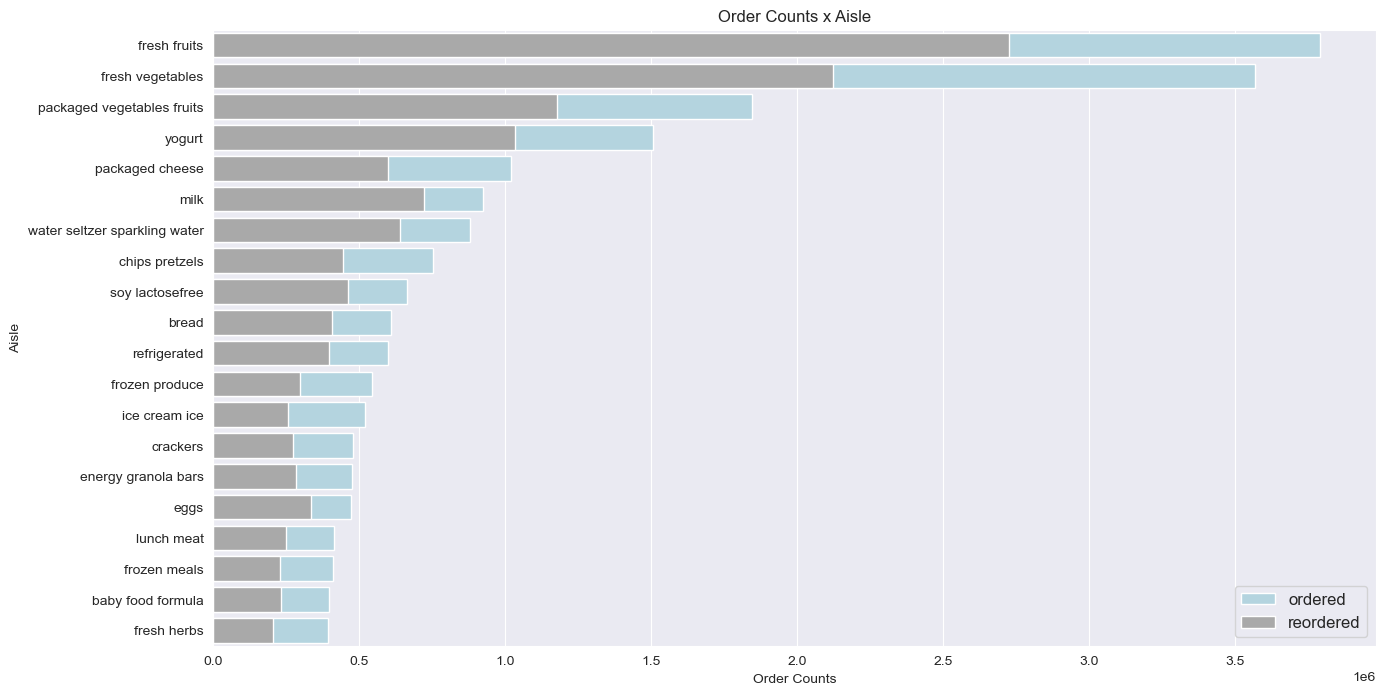

In [61]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.orders[0:20], color='lightblue', label = "ordered")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color='darkgrey', label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Order Counts")
ax.set_title("Order Counts x Aisle")
ax.legend(loc = 4, prop={'size': 12})
fig.savefig('_plts/Order Counts x Aisle.png')
plt.show()

In [62]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.orders
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

N highest reorder ratios

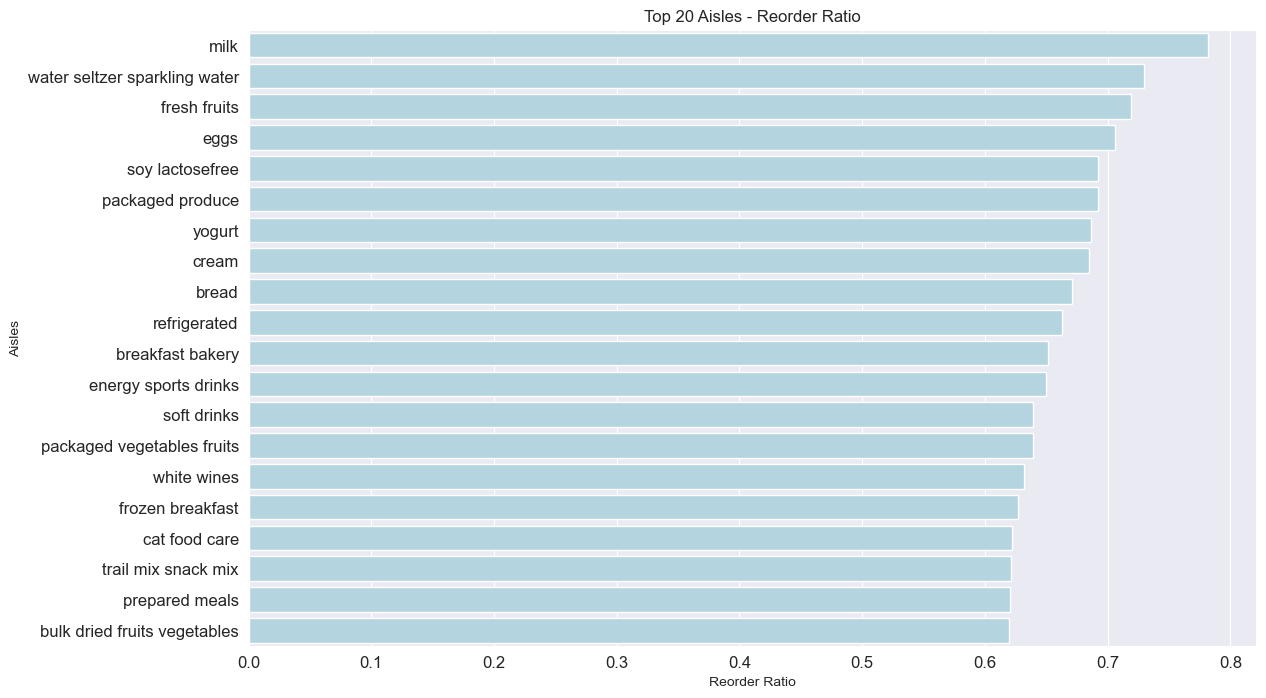

In [65]:
n=20
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[0:n], x = temp_df.reorder_ratio[0:n], color='lightblue')
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title(f"Top {n} Aisles - Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
fig.savefig(f"_plts/highest_20_aisles_reorder_ratio")
plt.show()

N lowest reorder ratios

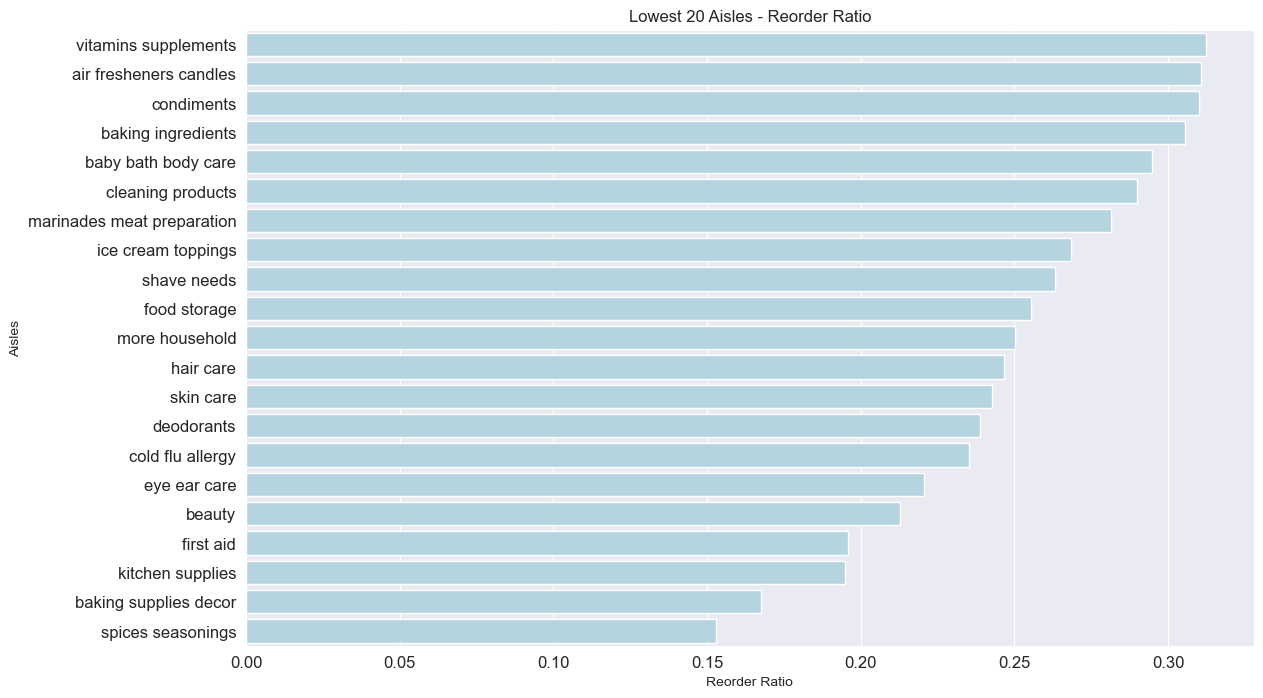

In [66]:
n=20
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[(n+1)*-1:], x = temp_df.reorder_ratio[(n+1)*-1:], color='lightblue')
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title(f"Lowest {n} Aisles - Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
fig.savefig(f"_plts/lowest_20_aisles_reorder_ratio")
plt.show()

### Departments

In [20]:
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'orders','sum':'reorders'})
temp_df = temp_df.sort_values('orders', ascending=False).reset_index()

Order and reorder frequency by department.

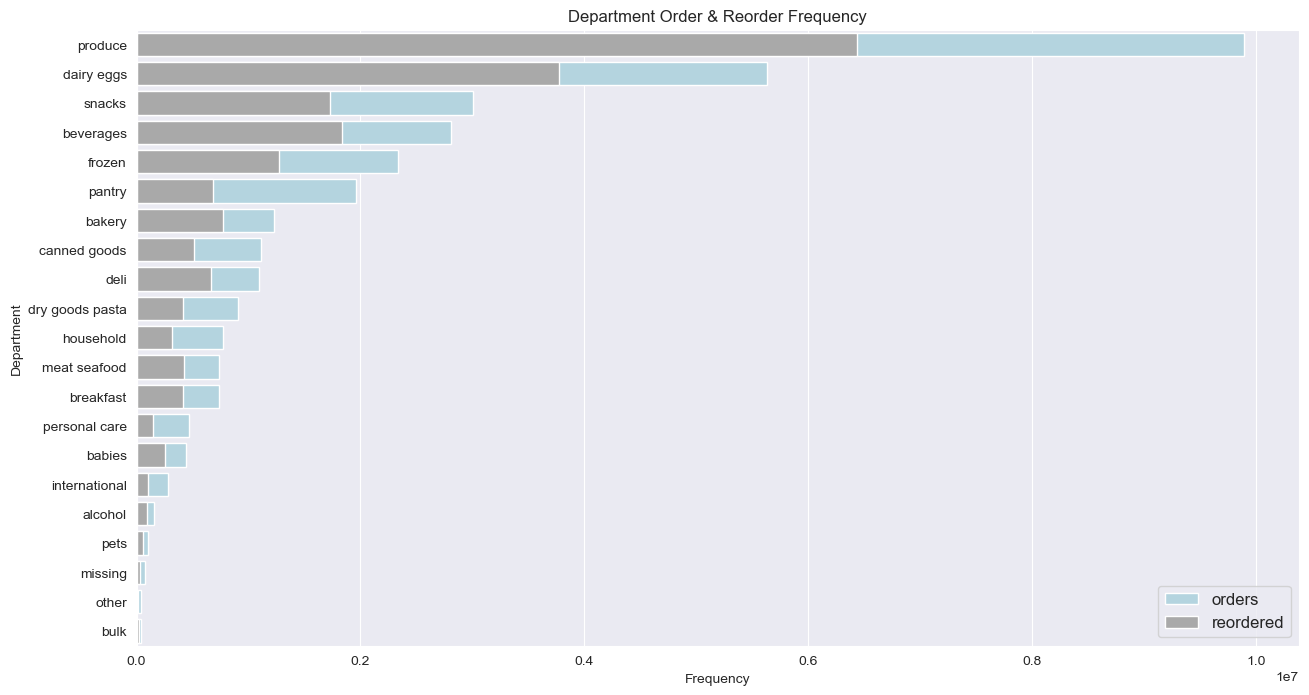

In [21]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df["orders"], color='lightblue', label = "orders")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color='darkgrey', label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Department Order & Reorder Frequency")
fig.savefig('_plts/Department Order & Reorder Frequency.png')
plt.show()

In [22]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.orders
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

Re-order ratio by department.

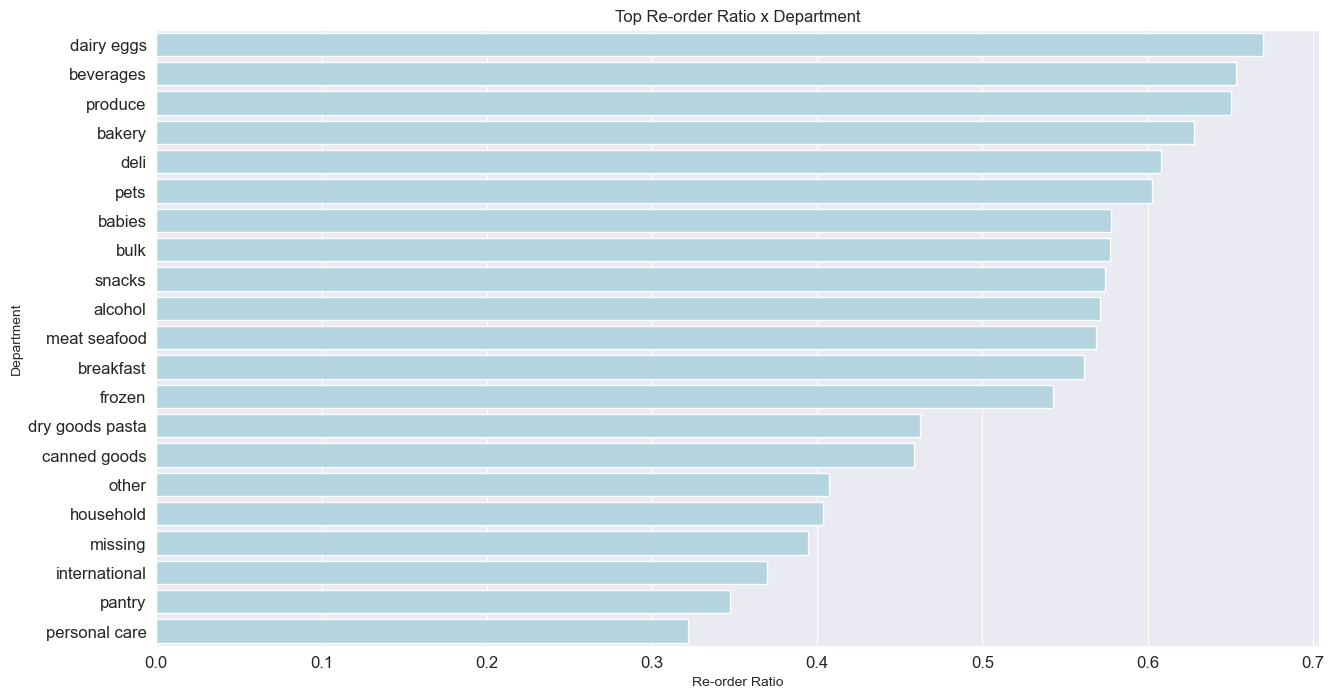

In [23]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df.reorder_ratio, color='lightblue')
ax.set_ylabel("Department")
ax.set_xlabel("Re-order Ratio")
ax.set_title("Top Re-order Ratio x Department")
ax.tick_params(axis = 'both', labelsize = 12)
fig.savefig('_plts/Top Re-order Ratio x Department.png')
plt.show()

### Products

In [24]:
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'orders','sum':'reorders'})
temp_df = temp_df.sort_values('orders', ascending=False).reset_index()

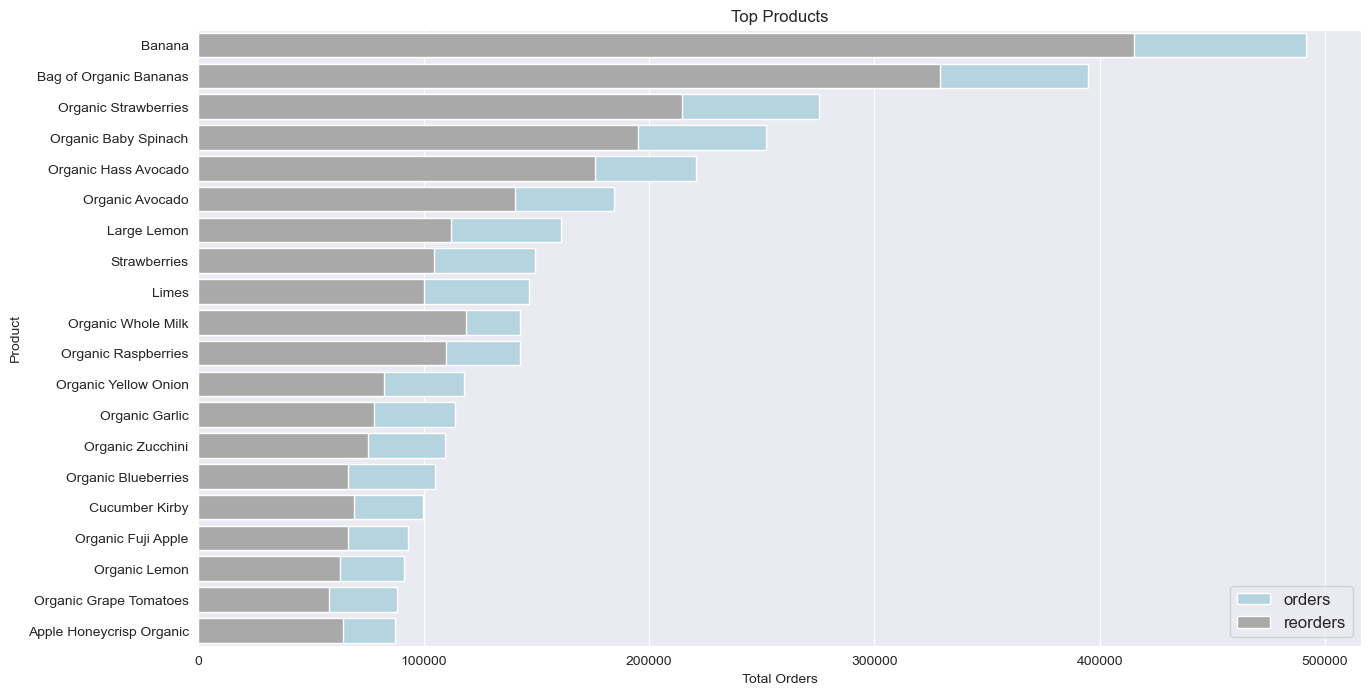

In [25]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.orders[0:20], color='lightblue', label = "orders")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color='darkgrey', label = "reorders")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Top Products")
ax.legend(loc = 4, prop={'size': 12})
fig.savefig('_plts/Top Products.png')
plt.show()

In [26]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.orders
print(temp_df.sort_values("reorder_ratio", ascending=False).head(10))

                                   product_name  orders  reorders  \
23853                       Raw Veggie Wrappers      69        65   
21388  Serenity Ultimate Extrema Overnight Pads      90        84   
40147                       Orange Energy Shots      13        12   
20296                        Chocolate Love Bar     102        94   
30746                 Soy Powder Infant Formula      35        32   
28078          Simply Sleep Nighttime Sleep Aid      45        41   
35213                 Energy Shot, Grape Flavor      22        20   
32316   Russian River Valley Reserve Pinot Noir      30        27   
23918                        Bars Peanut Butter      69        62   
24218                 Soy Crisps Lightly Salted      67        60   

       reorder_ratio  
23853       0.942029  
21388       0.933333  
40147       0.923077  
20296       0.921569  
30746       0.914286  
28078       0.911111  
35213       0.909091  
32316       0.900000  
23918       0.898551  
24218     

#### Customer breakdown

In [27]:
unique_prod_cust = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_customers'})
print(unique_prod_cust.sort_values('total_customers', ascending = False).head(10))

                 product_name  total_customers
3677                   Banana            76125
3472   Bag of Organic Bananas            65655
31923    Organic Strawberries            61129
28843    Organic Baby Spinach            56766
22415             Large Lemon            48614
23422                   Limes            46658
42908            Strawberries            44857
30300    Organic Hass Avocado            44704
28807         Organic Avocado            43954
29011     Organic Blueberries            38720


In [28]:
unique_prod_cust = unique_prod_cust.merge(temp_df, on='product_name', how='left')
print(unique_prod_cust.sort_values("reorder_ratio", ascending=False).head(20))

                                   product_name  total_customers  orders  \
37379                       Raw Veggie Wrappers                4      69   
39870  Serenity Ultimate Extrema Overnight Pads                6      90   
28415                       Orange Energy Shots                1      13   
8537                         Chocolate Love Bar                8     102   
41723                 Soy Powder Infant Formula                3      35   
40458          Simply Sleep Nighttime Sleep Aid                4      45   
13844                 Energy Shot, Grape Flavor                2      22   
38793   Russian River Valley Reserve Pinot Noir                3      30   
3832                         Bars Peanut Butter                7      69   
41712                 Soy Crisps Lightly Salted                7      67   
19868                        High Gravity Lager                4      38   
24026                           Maca Buttercups               11     104   
2147        

#### Cumulative Sum of Unique Users Per Product

In [29]:
temp_df = unique_prod_cust.sort_values("total_customers", ascending=False)
temp_df['cum_users'] = temp_df['total_customers'].cumsum()
temp_df = temp_df.reset_index(drop=True)
print(temp_df.head())

             product_name  total_customers  orders  reorders  reorder_ratio  \
0                  Banana            76125  491291    415166       0.845051   
1  Bag of Organic Bananas            65655  394930    329275       0.833755   
2    Organic Strawberries            61129  275577    214448       0.778178   
3    Organic Baby Spinach            56766  251705    194939       0.774474   
4             Large Lemon            48614  160792    112178       0.697659   

   cum_users  
0      76125  
1     141780  
2     202909  
3     259675  
4     308289  


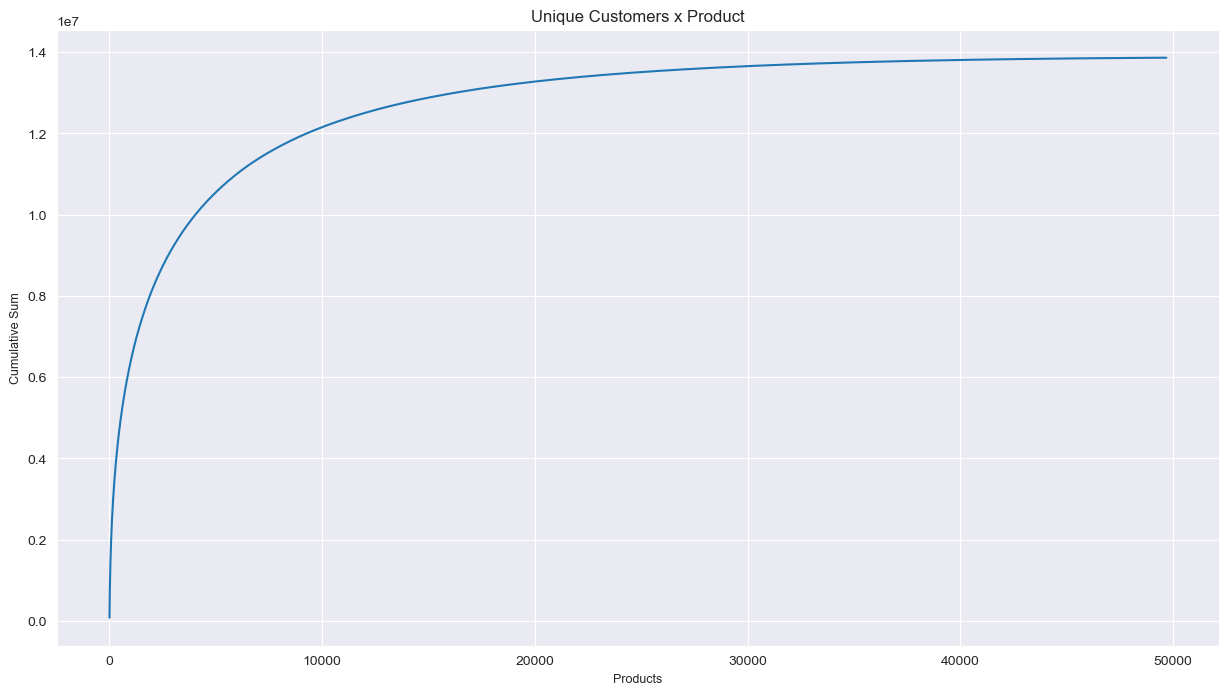

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = temp_df.index, y=temp_df.cum_users)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum", size = 9)
ax.set_title("Unique Customers x Product", size = 12)
fig.savefig('_plts/Unique Customers x Product.png')
plt.show()

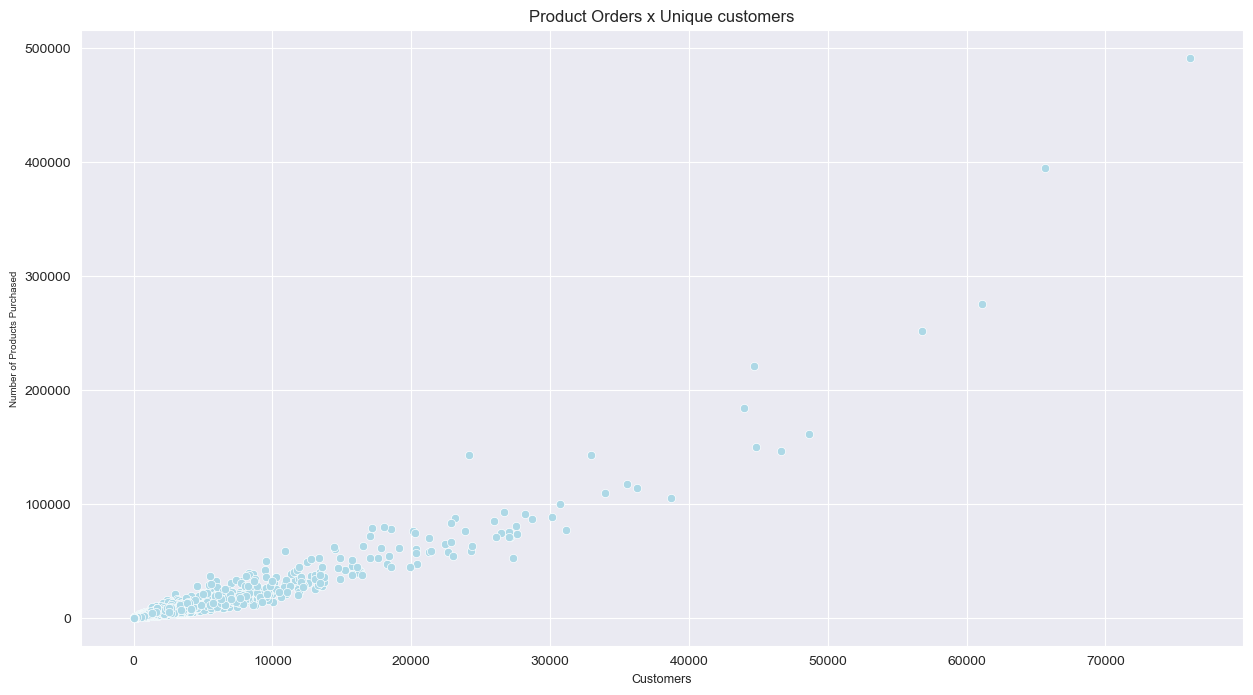

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = unique_prod_cust.orders, x = unique_prod_cust.total_customers, color = 'lightblue')
ax.set_xlabel("Customers", size = 9)
ax.set_ylabel("Number of Products Purchased", size = 7)
ax.set_title("Product Orders x Unique customers", size = 12)
fig.savefig('_plts/Product Orders x Unique customers.png')
plt.show()

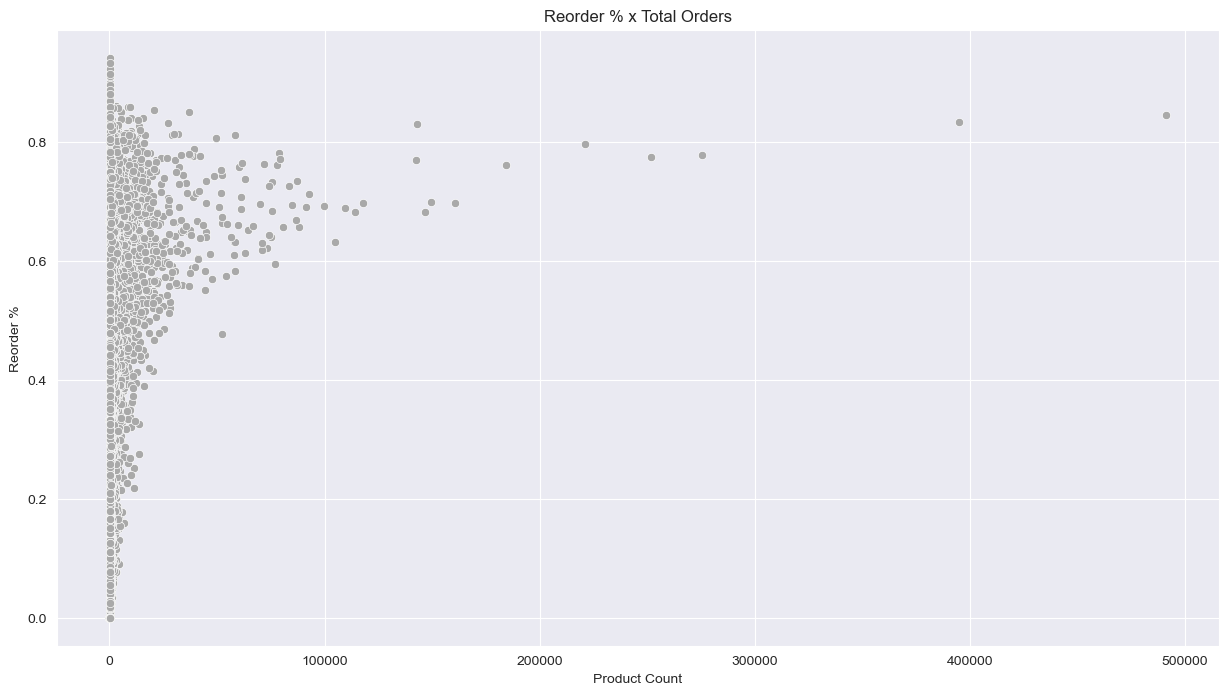

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.scatterplot(x = unique_prod_cust.orders, y = unique_prod_cust.reorder_ratio, color = 'darkgray')
ax.set_xlabel("Product Count")
ax.set_ylabel("Reorder %")
ax.set_title("Reorder % x Total Orders")
fig.savefig('_plts/Reorder % x Total Orders.png')
plt.show()

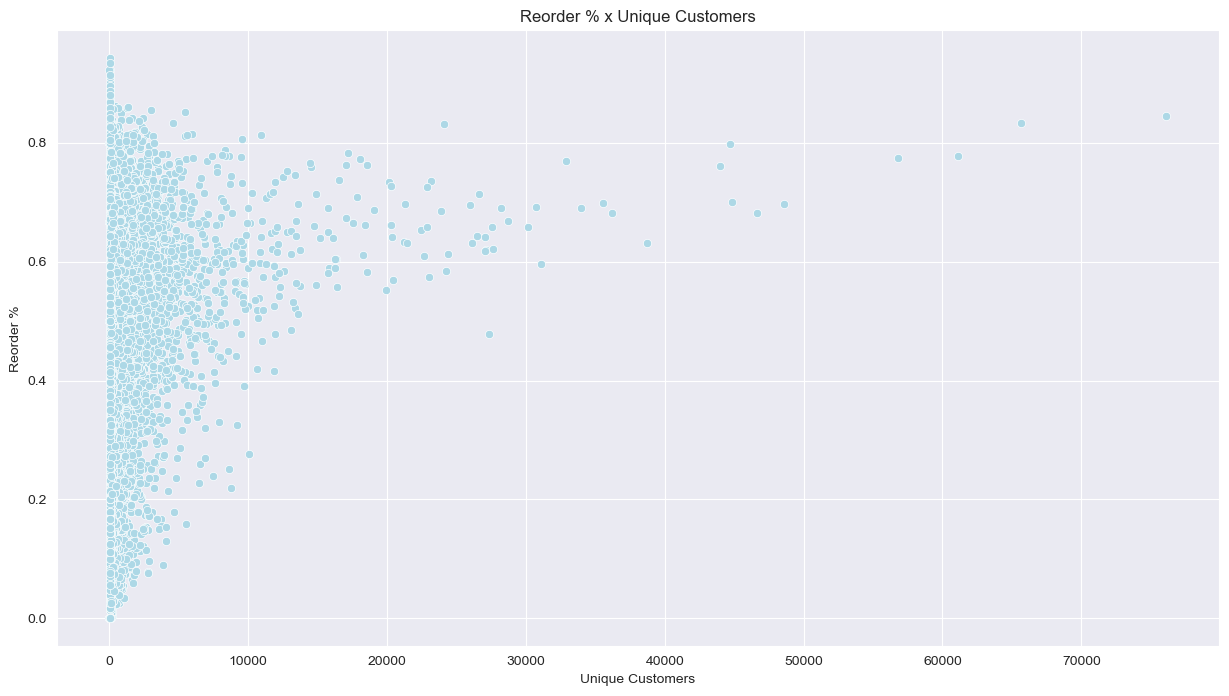

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(x = unique_prod_cust.total_customers, y = unique_prod_cust.reorder_ratio, color = 'lightblue')
ax.set_xlabel("Unique Customers")
ax.set_ylabel("Reorder %")
ax.set_title("Reorder % x Unique Customers")
fig.savefig('_plts/Reorder % x Unique Customers.png')
plt.show()

#### Organic Foods

In [34]:
unique_prod_cust['Organic'] = unique_prod_cust.product_name.str.contains("Organic")
print(unique_prod_cust.head())

                             product_name  total_customers  orders  reorders  \
0                       #2 Coffee Filters              534     799       265   
1            #2 Cone White Coffee Filters               11      14         3   
2                   #2 Mechanical Pencils                9       9         0   
3         #4 Natural Brown Coffee Filters              157     247        90   
4  & Go! Hazelnut Spread + Pretzel Sticks               81     174        93   

   reorder_ratio  Organic  
0       0.331665    False  
1       0.214286    False  
2       0.000000    False  
3       0.364372    False  
4       0.534483    False  


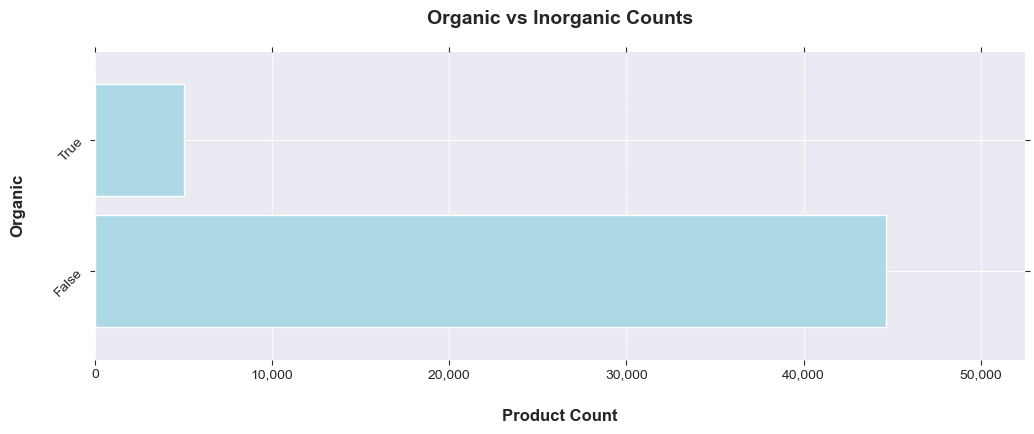

In [71]:
horizontal_bar(unique_prod_cust['Organic']
               , None
               , None
               , x_label='Product Count'
               , y_label='Organic'
               , title='Organic vs Inorganic Counts'
               , color='lightblue'
               , save_as='_plts/Organic vs Inorganic Counts.png')

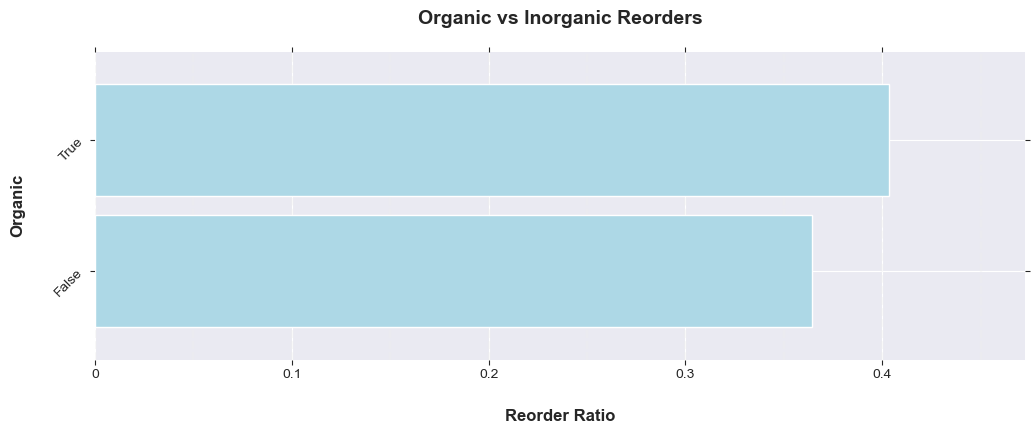

In [72]:
horizontal_bar(unique_prod_cust['Organic']
               , unique_prod_cust['reorder_ratio']
               , None
               , x_label='Reorder Ratio'
               , y_label='Organic'
               , color='lightblue'
               , title='Organic vs Inorganic Reorders'
               , save_as='_plts/Organic vs Inorganic Reorders.png')

#### Add to Cart Order VS Reorder  

In [38]:
temp_df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
print(temp_df.head())

   add_to_cart_order  reordered
0                  1   0.679302
1                  2   0.677135
2                  3   0.658426
3                  4   0.637350
4                  5   0.617598


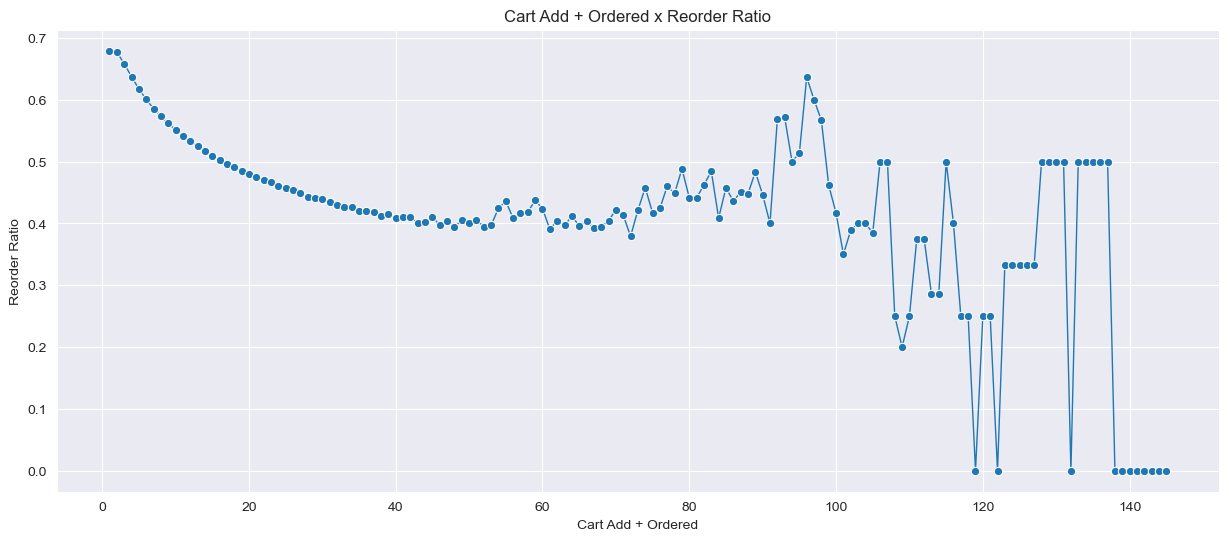

In [39]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Cart Add + Ordered")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Cart Add + Ordered x Reorder Ratio")
fig.savefig('_plts/Cart Add + Ordered x Reorder Ratio.png')
plt.show()

#### Most Popular Products on different days

In [74]:
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

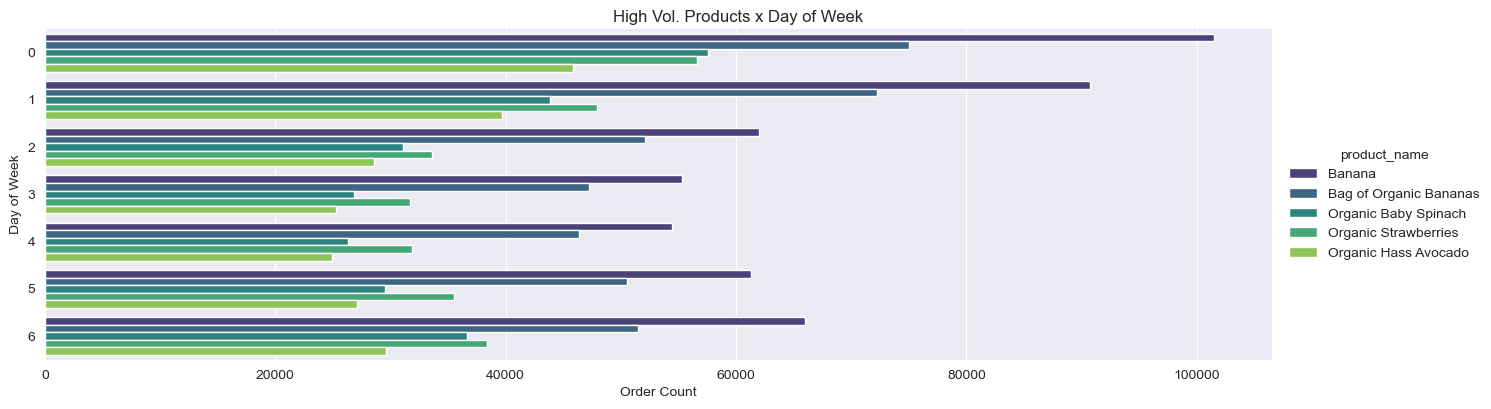

In [75]:
horizontal_catplot(temp_df
                   , "counts"
                   , "order_dow"
                   , hue="product_name"
                   , x_label='Order Count'
                   , y_label='Day of Week'
                   , title='High Vol. Products x Day of Week'
                   , figsize=(13, 4)
                   , color='viridis'
                   , save_as='_plts/high_vol_prod_x_dow.png')

### products: <a class=anchor id="4"></a>
[Back to top](#0)

- 49688 products by aisle and department.
- Variation of product ct. by aisle / dept.

In [ ]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [ ]:
print(len(products.product_name.unique()))

49688


In [ ]:
print(len(products.aisle_id.unique()))

134


In [ ]:
print(len(products.department_id.unique()))

21


In [ ]:
temp_df = pd.DataFrame(products.groupby('aisle_id')['product_id'].count()).reset_index()
temp_df.columns = ['aisle_id', 'product_count']

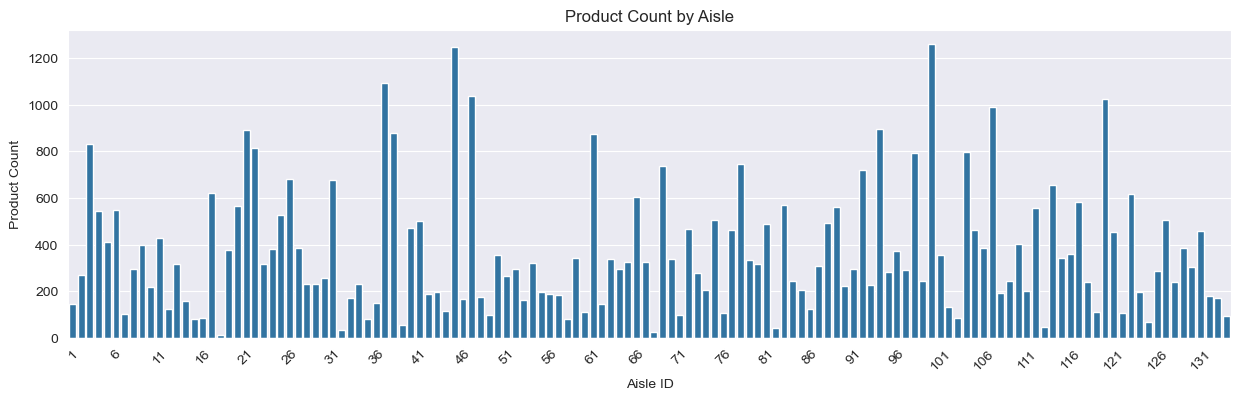

In [ ]:
simple_bar(temp_df
           , x='aisle_id'
           , y='product_count'
           , title='Product Count by Aisle'
           , xlabel='Aisle ID'
           , ylabel='Product Count'
           , palette=None
           , figsize=(15, 4)
           , save_as='./_plts/product_count_by_aisle.png')

In [ ]:
temp_df = pd.DataFrame(products.groupby('department_id')['product_id'].count()).reset_index()
temp_df.columns = ['department_id', 'product_count']

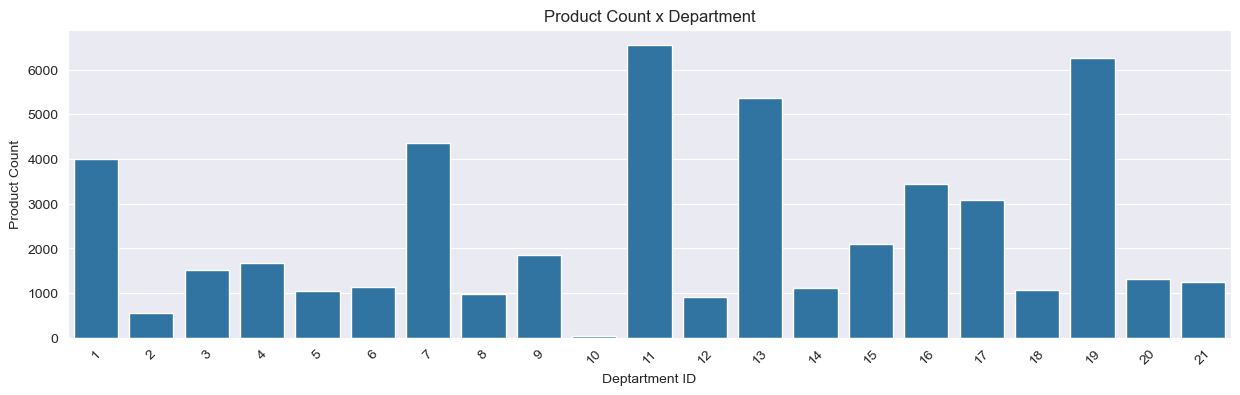

In [ ]:
simple_bar(temp_df
           , x='department_id'
           , y='product_count'
           , title='Product Count x Department'
           , xlabel='Deptartment ID'
           , ylabel='Product Count'
           , palette=None
           , n=1
           , figsize=(15, 4)
           , save_as='./_plts/product_count_by_department.png')

In [ ]:
temp_df = pd.DataFrame(products.groupby('department_id')['aisle_id'].nunique()).reset_index()
temp_df.columns = ['department_id', 'aisle_count']

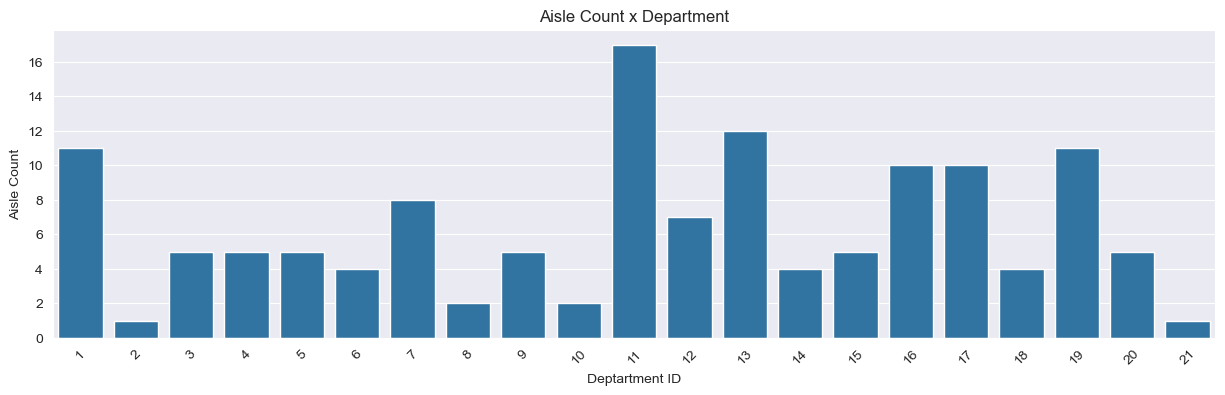

In [ ]:
simple_bar(temp_df
           , x='department_id'
           , y='aisle_count'
           , title='Aisle Count x Department'
           , xlabel='Deptartment ID'
           , ylabel='Aisle Count'
           , palette=None
           , n=1
           , figsize=(15, 4)
           , save_as='./_plts/aisle_count_by_department.png')

### orders: <a class=anchor id="5"></a>
[Back to top](#0)

- There are total 3421083 orders made by total 206209 users.
- There are three sets of orders: Prior, Train and Test. The distributions of orders in Train and Test sets are similar whereas the distribution of orders in Prior set is different.
- The total orders per customer ranges from 0 to 100. 
- Majority of the orders are made during the day time.

In [ ]:
orders.head(12)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   eval_set                object 
 3   order_number            int8   
 4   order_dow               int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float16
dtypes: float16(1), int32(2), int8(3), object(1)
memory usage: 68.5+ MB


In [ ]:
print(len(orders.order_id.unique()))

3421083


In [ ]:
print(len(orders.user_id.unique()))

206209


In [ ]:
print(orders.eval_set.value_counts())

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64


In [ ]:
print(orders.order_number.describe().apply(lambda x: format(x, '.2f')))

count    3421083.00
mean          17.15
std           17.73
min            1.00
25%            5.00
50%           11.00
75%           23.00
max          100.00
Name: order_number, dtype: object


In [ ]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = pd.DataFrame(order_number.value_counts()).reset_index()

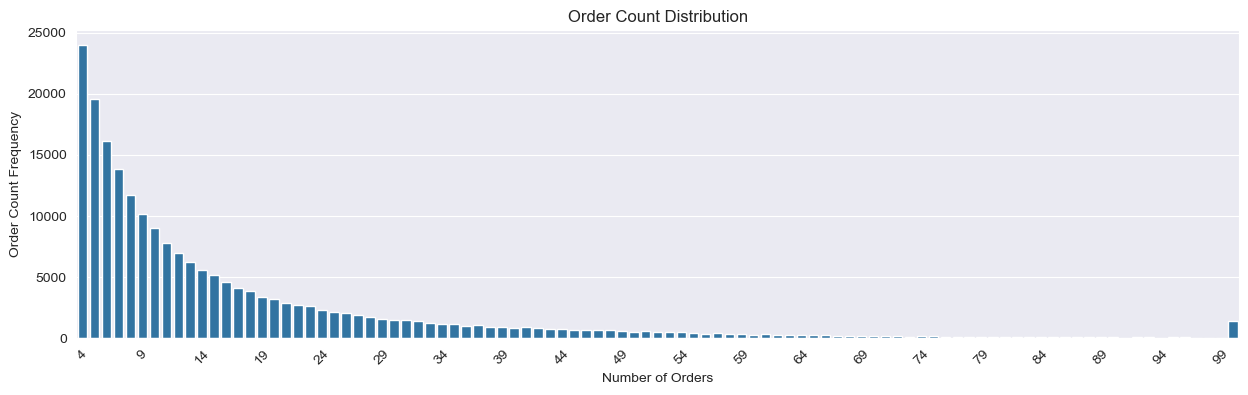

In [ ]:
simple_bar(order_number
           , x='order_number'
           , y='count'
           , xlabel='Number of Orders'
           , ylabel='Order Count Frequency'
           , title='Order Count Distribution'
           , palette=None
           , figsize=(15, 4)
           , save_as='./_plts/order_count_distribution.png')

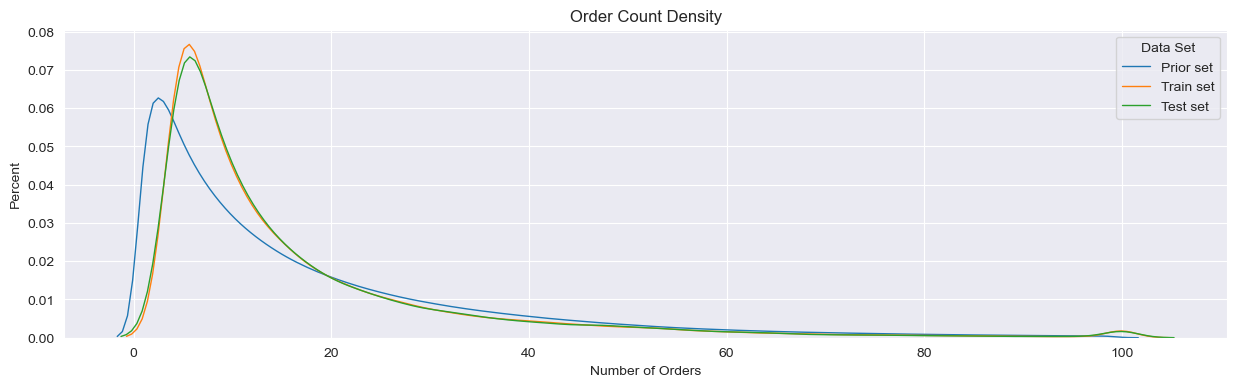

In [ ]:
fig, ax = plt.subplots(figsize = (15,4))
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'], label = "Prior set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'], label = "Train set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'], label = "Test set", lw = 1)
# Add legend
plt.legend(title = 'Data Set')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Percent')
ax.set_title('Order Count Density')
ax.tick_params(axis = 'both', labelsize = 10)

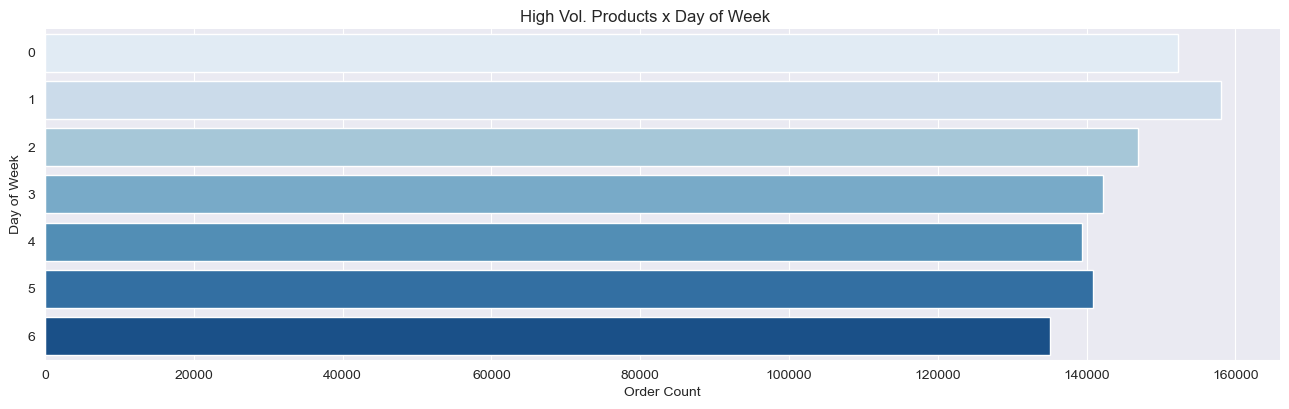

In [ ]:

temp_df = pd.DataFrame(orders.groupby('order_dow')['user_id'].nunique()).reset_index()
horizontal_catplot(temp_df
                   , "user_id"
                   , "order_dow"
                   , x_label='Order Count'
                   , y_label='Day of Week'
                   , title='High Vol. Products x Day of Week'
                   , figsize=(13, 4)
                   , color='Blues'
                   , save_as='./_plts/high_vol_products_by_dow.png')

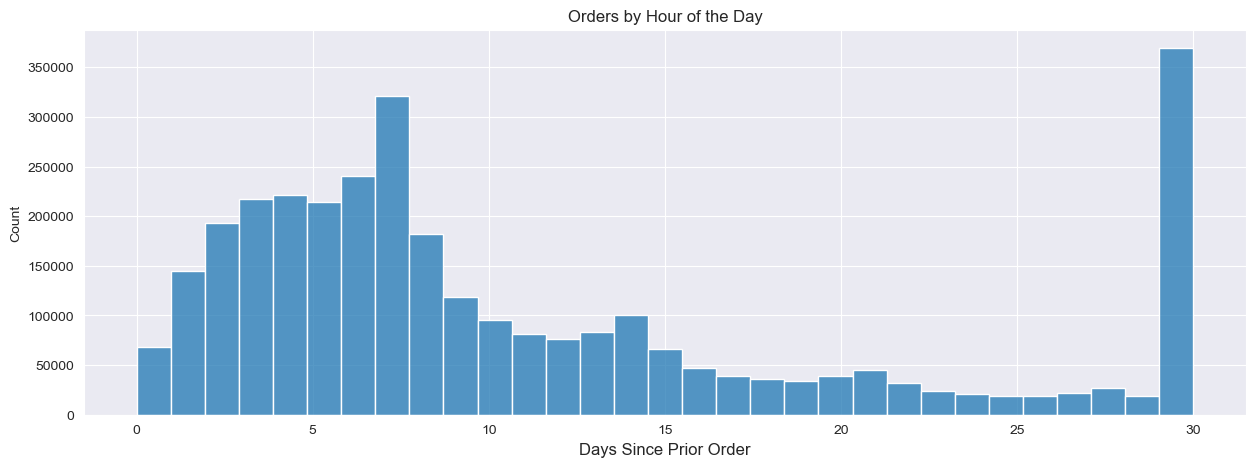

In [ ]:
histogram_boxplot(orders
                  , x='days_since_prior_order'
                  , xlabel='Days Since Prior Order'
                  , bins=orders.days_since_prior_order.nunique()
                  , title='Orders by Hour of the Day'
                  , boxplot=False
                  , save_as='./_plts/orders_by_hour_of_day.png')

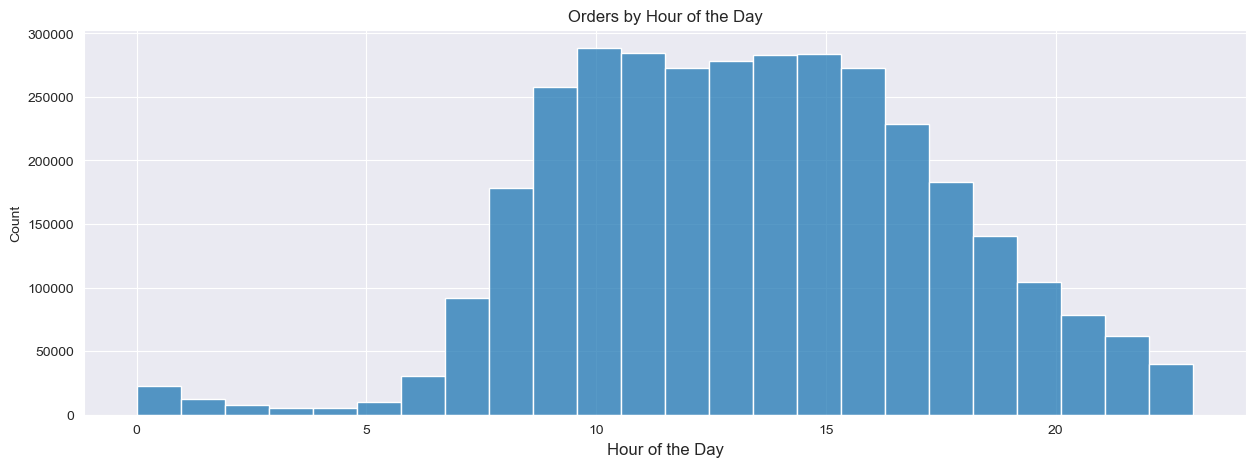

In [ ]:
histogram_boxplot(orders
                  , x='order_hour_of_day'
                  , xlabel='Hour of the Day'
                  , bins=24
                  , title='Orders by Hour of the Day'
                  , boxplot=False
                  , save_as='./_plts/orders_by_hour_of_day.png')

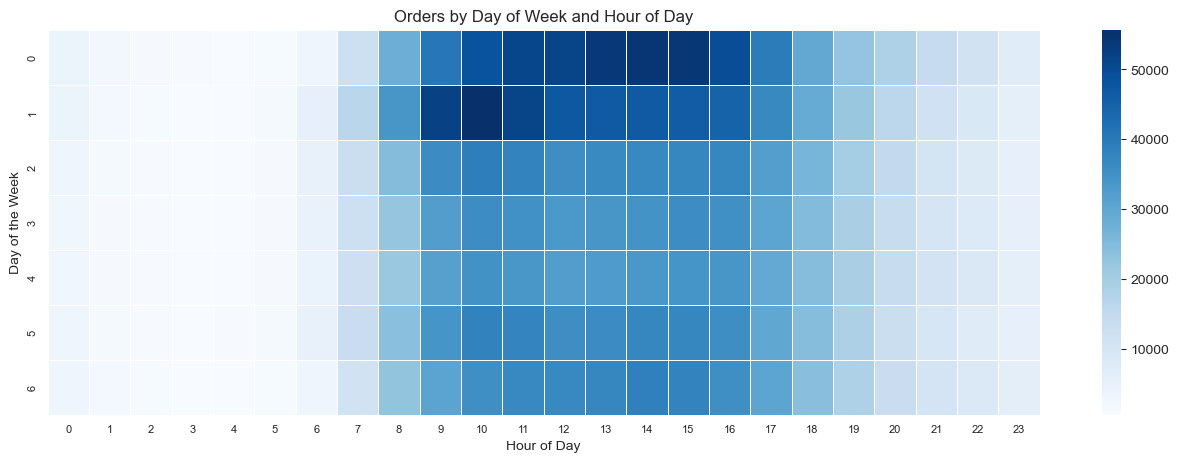

In [ ]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df = temp_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

simple_heatmap(data=temp_df
               ,title='Orders by Day of Week and Hour of Day'
               , x_label='Hour of Day'
               , y_label='Day of the Week'
               , figsize=(16,5)
               , save_as='./_plts/orders_by_dow_and_hour_of_day.png')

### order_products_prior: <a class=anchor id="6"></a>
[Back to top](#0)

Dataset details products purchased the order in which they were added to the cart. It also tells us that if the product was reordered or not. 

- Order level item count roughly 1-15 items on avg. with a maximum of 145 items.
- 3214874 orders & 49677 products.
- Reorder pct. is 58.97%.

In [ ]:
order_products_train.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [ ]:
print(len(order_products_train.order_id.unique()))

131209


In [ ]:
print(len(order_products_train.product_id.unique()))

39123


In [ ]:
add_to_cart_order_train = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_train = pd.DataFrame(add_to_cart_order_train.value_counts()).reset_index()

In [ ]:
add_to_cart_order_train.head()

,add_to_cart_order,count
0,5,228330
1,6,227675
2,4,222081
3,7,220006
4,3,207027


In [ ]:
print(add_to_cart_order_train.index.max())

112


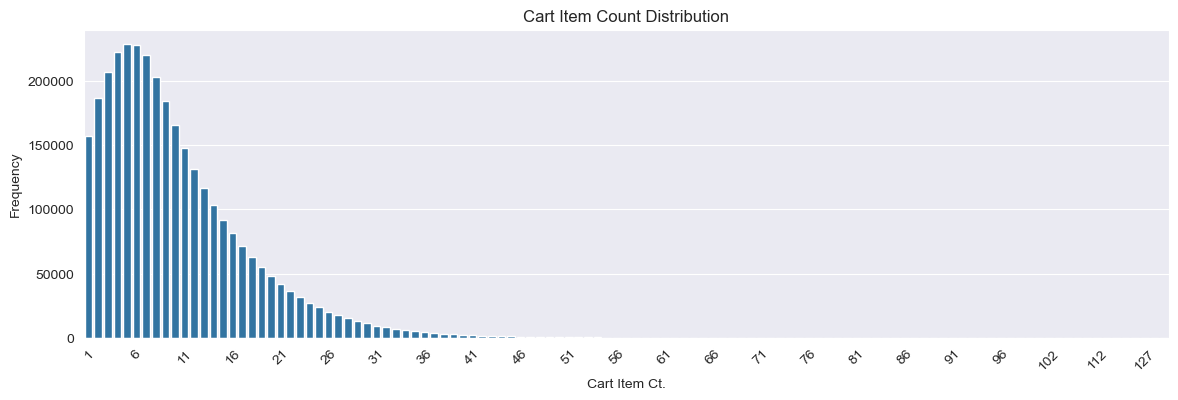

In [ ]:
simple_bar(data=add_to_cart_order_train
           , x='add_to_cart_order'
           , y='count'
           , sort_by='add_to_cart_order'
           , figsize=(14,4)
           , n=5
           , palette=None
           , xlabel='Cart Item Ct.'
           , ylabel='Frequency'
           , title='Cart Item Count Distribution'
           , save_as='./_plts/cart_item_count_distribution.png')

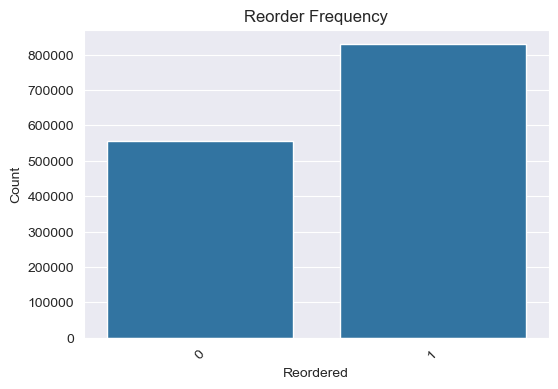

In [ ]:
temp_df = pd.DataFrame(order_products_train.reordered.value_counts()).reset_index()
temp_df.columns = ['Reordered', 'Count']

simple_bar(temp_df
           , x='Reordered'
           , y='Count'
           , figsize=(6,4)
           , n=1
           , palette=None
           , xlabel='Reordered'
           , ylabel='Count'
           , title='Reorder Frequency'
           , save_as='./_plts/reorder_frequency.png')

In [ ]:
print('Training set reorder pct.:',
      format(order_products_train[order_products_train.reordered == 1].shape[0]*100/order_products_train.shape[0], '.2f'), '%')

Training set reorder pct.: 59.86 %


### departments: <a class=anchor id="7"></a>
[Back to top](#0)


21 unique departments.

In [ ]:
print(len(departments.department.unique()))

21


In [ ]:
print(departments.department.unique())

['frozen' 'other' 'bakery' 'produce' 'alcohol' 'international' 'beverages'
 'pets' 'dry goods pasta' 'bulk' 'personal care' 'meat seafood' 'pantry'
 'breakfast' 'canned goods' 'dairy eggs' 'household' 'babies' 'snacks'
 'deli' 'missing']
